# Recommendation System

## Commet Configurations

In [2]:
! pip install comet_ml

ERROR: Could not find a version that satisfies the requirement commet_ml (from versions: none)
ERROR: No matching distribution found for commet_ml


In [3]:
# import comet_ml
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="HfSNpkY9koDD8GCccjV6a7o3K",
    project_name="nlp-tweet-sentiment-analysis",
    workspace="mafikengz",
)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mafikengz/nlp-tweet-sentiment-analysis/cebb3ead8e794805b3c1c4cafd1bb608



## Import Libraries

In [1]:
#Scientific libraries
import numpy as np 
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Configurations
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [13]:
movies = pd.read_csv("movies.csv")
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('train.csv')
imdb_data = pd.read_csv('imdb_data.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [8]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [14]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [15]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [16]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [18]:
tags.head(10)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
5,4,44665,unreliable narrators,1573943619
6,4,115569,tense,1573943077
7,4,115713,artificial intelligence,1573942979
8,4,115713,philosophical,1573943033
9,4,115713,tense,1573943042


## Exploratory Data Analysis(EDA)

In [32]:
userid = pd.Series(df_train['userId'])
movieid = pd.Series(df_train['movieId'])
ratings = pd.Series(df_train['rating'])
title = pd.Series(movies['title'])

data = pd.concat([userid , movieid , ratings , title], axis=1 )

In [33]:
data.head()

,userId,movieId,rating,title
0,5163,57669,4.0,Toy Story (1995)
1,106343,5,4.5,Jumanji (1995)
2,146790,5459,5.0,Grumpier Old Men (1995)
3,106362,32296,2.0,Waiting to Exhale (1995)
4,9041,366,3.0,Father of the Bride Part II (1995)


In [45]:
movie_rating = pd.DataFrame(data.groupby('title')['rating'].mean().sort_values(ascending=False))
movie_rating['count'] = pd.DataFrame(data.groupby('title')['rating'].count().sort_values(ascending=False))

In [58]:
movie_rating.head()

,rating,count
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",5.0,1
Funny Games (1997),5.0,1
The Crooked Circle (1932),5.0,1
The Crisis of Civilization (2012),5.0,1
Fun (1994),5.0,1


Text(0.5, 0, 'Ratings')

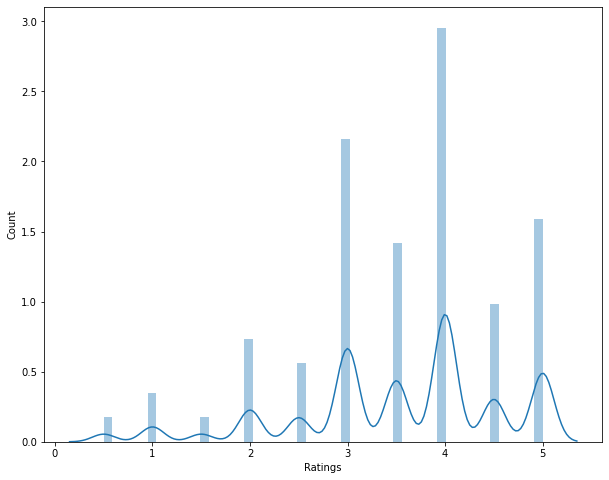

In [56]:
plt.figure(figsize=(10,8))
sns.distplot(movie_rating['rating'])
plt.ylabel('Count')
plt.xlabel('Ratings')

In [86]:
data.groupby('title')['userId'].count().sort_values(ascending=False).head()

title
Rebirth (2011)       2
The Tunnel (1933)    2
Macbeth (2015)       2
Deranged (2012)      2
Aladdin (1992)       2
Name: userId, dtype: int64

In [73]:
data['userId'].value_counts()

72315     12952
80974      3680
137293     3588
33844      3208
20055      3050
          ...  
79087         1
53640         1
121071        1
127098        1
55362         1
Name: userId, Length: 162541, dtype: int64